# Project Name: Image Classification with Deep Learning

# Prepared By: SHANZA MUMTAZ

# Introduction to Image Classification with Deep Learning

#### Image classification is a fundamental task in computer vision, where the goal is to categorize images into predefined classes based on their visual content. It has numerous applications, ranging from facial recognition and autonomous driving to medical diagnosis and retail analytics.

#### With the advent of deep learning, particularly Convolutional Neural Networks (CNNs), image classification has seen significant advancements. CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input images, making them highly effective for image recognition tasks.

#### In this tutorial, Shanza Mumtaz will explore the basics of image classification using a popular deep learning framework, TensorFlow, along with its high-level API, Keras. We will utilize the CIFAR-10 dataset, a widely used dataset consisting of 60,000 32x32 color images in 10 different classes, including airplanes, automobiles, birds, cats, and more.

# Objectives:

### 1.Data Preprocessing: Learn how to prepare and preprocess image data for training a neural network, including normalization and one-hot encoding.
### 2.Model Building: Understand the architecture of CNNs and build a model using Keras.
### 3.Model Training and Evaluation: Train the model using the training data and evaluate its performance on the test set.
### 4.Visualization and Interpretation: Visualize the training process and interpret the results, including accuracy and loss metrics.

# Importance of Image Classification:

#### The ability to automatically classify images is crucial in many real-world applications:

#### Healthcare: Automated classification of medical images, such as X-rays or MRIs, to assist in diagnosis.
#### Retail: Image recognition for inventory management, product recommendations, and customer behavior analysis.
#### Security: Facial recognition systems for identification and verification purposes.
#### Transportation: Autonomous vehicles use image classification to recognize objects and navigate environments.

### Training Process

- **Compilation**: Setting up the model with an optimizer, loss function, and evaluation metrics.
- **Training**: Training the model on the training data and validating it on the test data.


## Applications

The ability to automatically classify images is crucial in many real-world applications:
- **Healthcare**: Automated classification of medical images, such as X-rays or MRIs, to assist in diagnosis.
- **Retail**: Image recognition for inventory management, product recommendations, and customer behavior analysis.
- **Security**: Facial recognition systems for identification and verification purposes.
- **Transportation**: Autonomous vehicles use image classification to recognize objects and navigate environments.

# Importing all the necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Loading the dataset

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


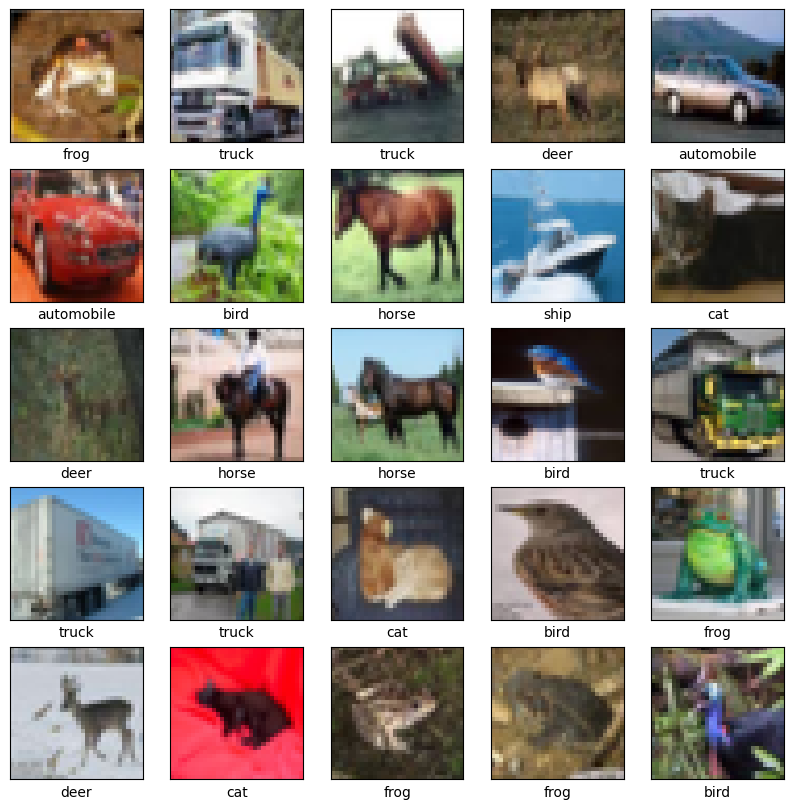

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


# Build the model with an Input layer

In [26]:

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


# Compile the model

In [27]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model

In [28]:

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.3620 - loss: 1.7383 - val_accuracy: 0.5515 - val_loss: 1.2333
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5772 - loss: 1.1917 - val_accuracy: 0.6135 - val_loss: 1.1049
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6368 - loss: 1.0305 - val_accuracy: 0.6430 - val_loss: 1.0092
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6778 - loss: 0.9200 - val_accuracy: 0.6754 - val_loss: 0.9381
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7021 - loss: 0.8406 - val_accuracy: 0.6789 - val_loss: 0.9404
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7251 - loss: 0.7813 - val_accuracy: 0.6971 - val_loss: 0.8703
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7493 - loss: 0.7133 - val_accuracy: 0.6951 - val_loss: 0.8819
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7608 -

# Evaluate the model

In [30]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7094 - loss: 0.8524
Test accuracy: 0.705


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Flatten the image data for histogram

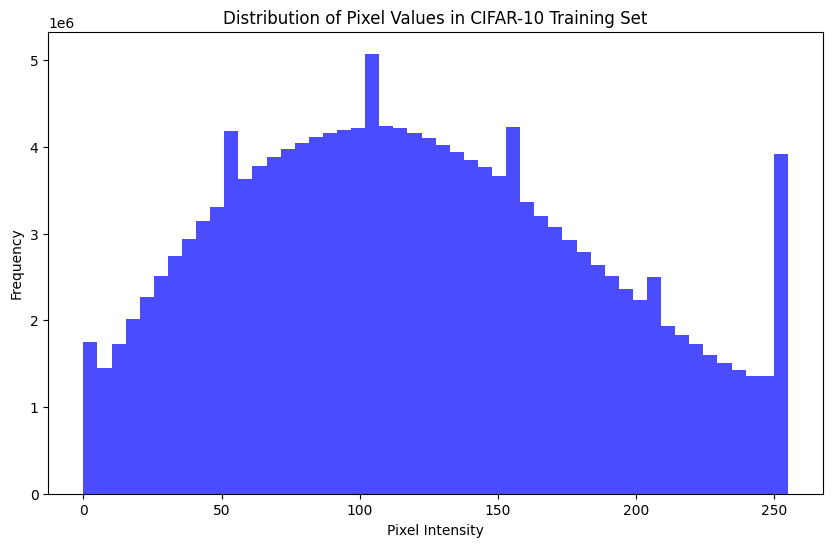

In [10]:

pixel_values = x_train.flatten()


plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values in CIFAR-10 Training Set')
plt.show()


# Bar chart for class distribution


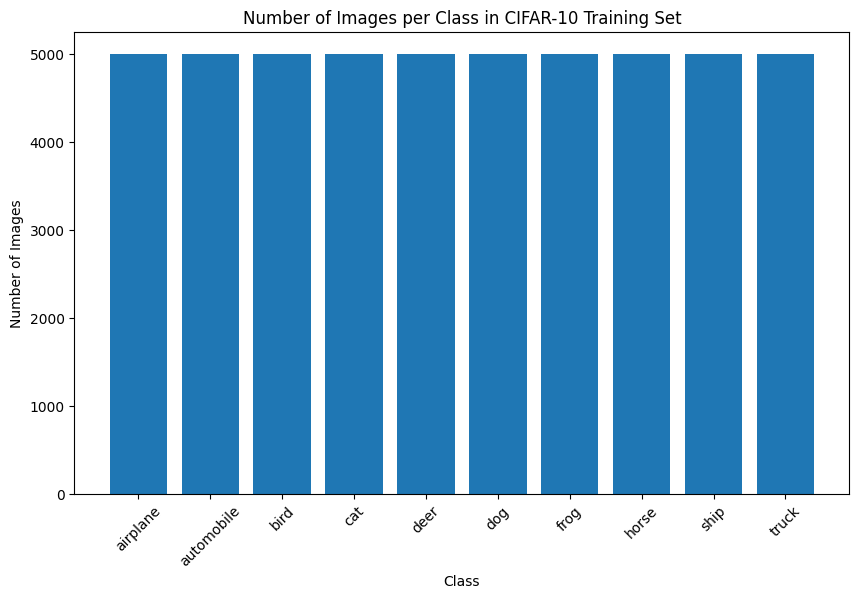

In [11]:

class_counts = np.bincount(y_train)

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in CIFAR-10 Training Set')
plt.xticks(rotation=45)
plt.show()


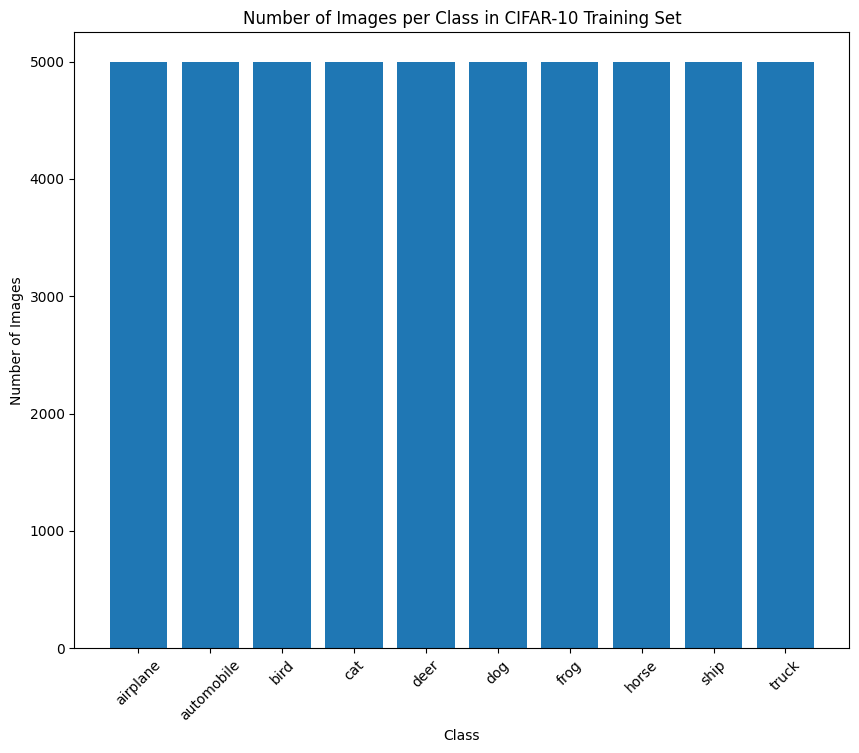

In [13]:

plt.figure(figsize=(10, 8))
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in CIFAR-10 Training Set')
plt.xticks(rotation=45)
plt.show()


# Display a grid of 36 images (6x6)

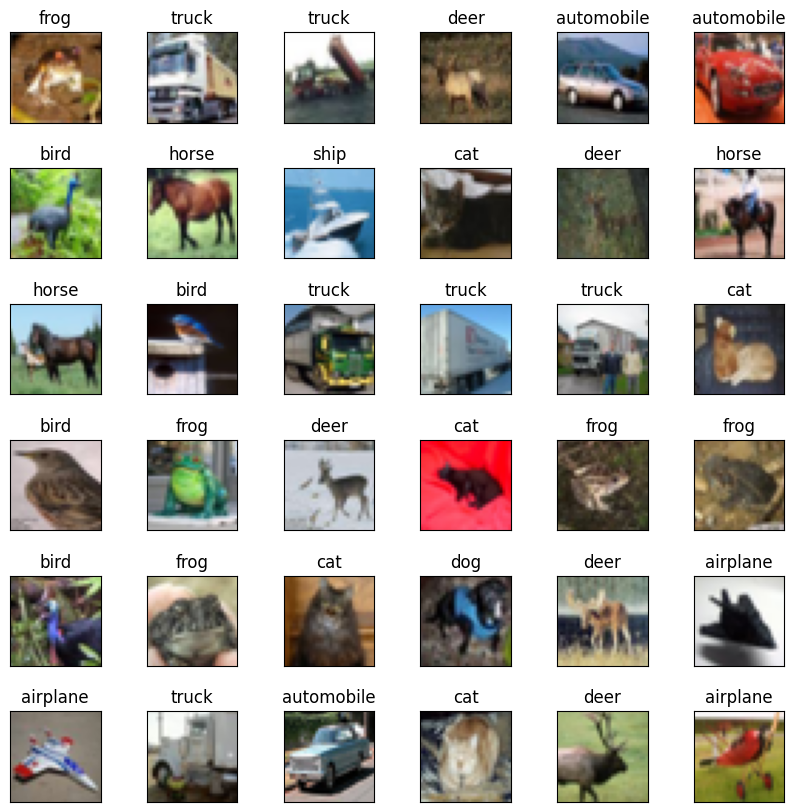

In [14]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(6, 6, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[i]])

plt.show()


# Pixel Intensity Distribution

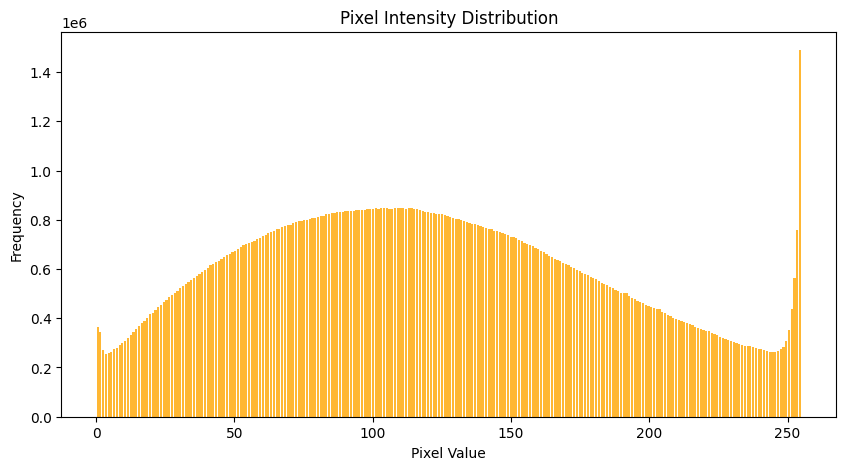

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(x_train.ravel(), bins=256, color='orange', alpha=0.8, rwidth=0.8)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


# Average Image per Class

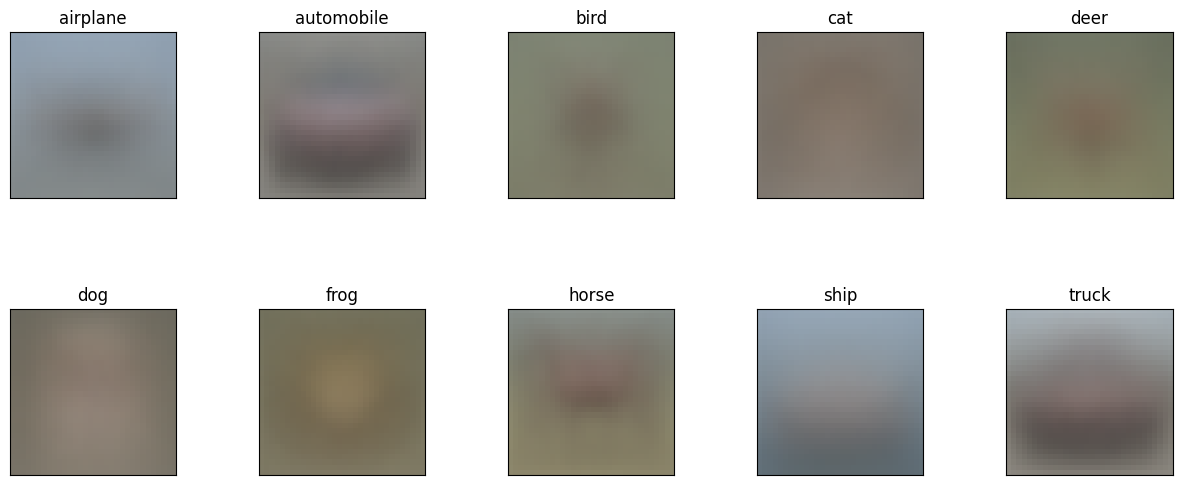

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
   
    class_images = x_train[y_train == i]
    avg_image = np.mean(class_images, axis=0).astype(np.uint8)
    
    ax.imshow(avg_image)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[i])

plt.show()


# Equal aspect ratio ensures the pie is drawn as a circle.

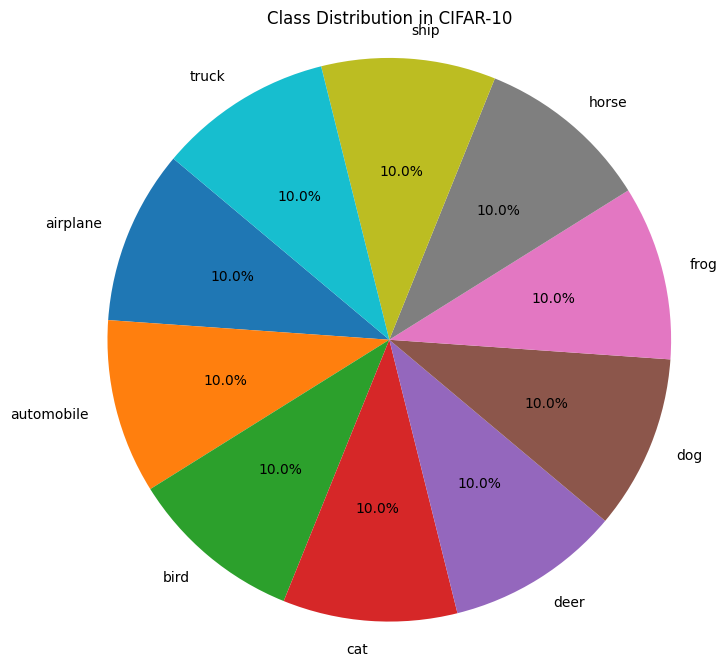

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Class Distribution in CIFAR-10')
plt.show()


# Plot heatmap

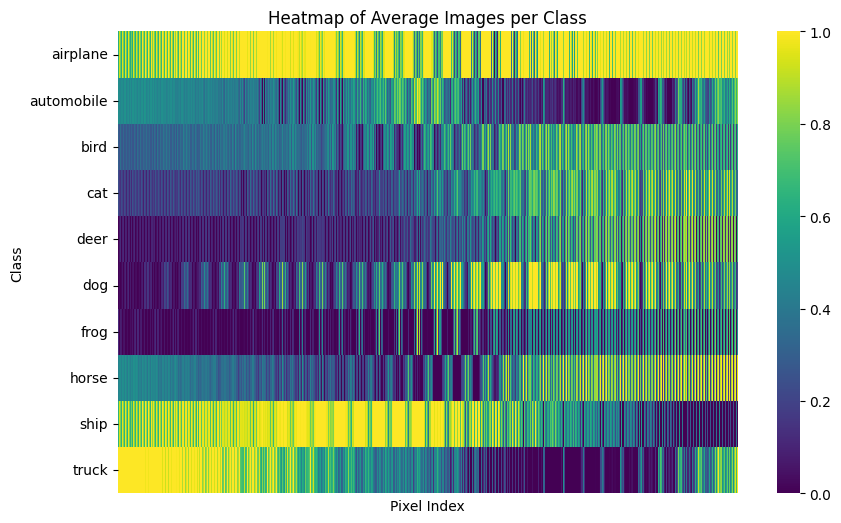

In [19]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


avg_images = np.array([np.mean(x_train[y_train == i], axis=0) for i in range(10)])
avg_images_flat = avg_images.reshape(avg_images.shape[0], -1)


scaler = MinMaxScaler()
avg_images_flat_norm = scaler.fit_transform(avg_images_flat)


plt.figure(figsize=(10, 6))
sns.heatmap(avg_images_flat_norm, cmap='viridis', xticklabels=False, yticklabels=class_names)
plt.title('Heatmap of Average Images per Class')
plt.xlabel('Pixel Index')
plt.ylabel('Class')
plt.show()


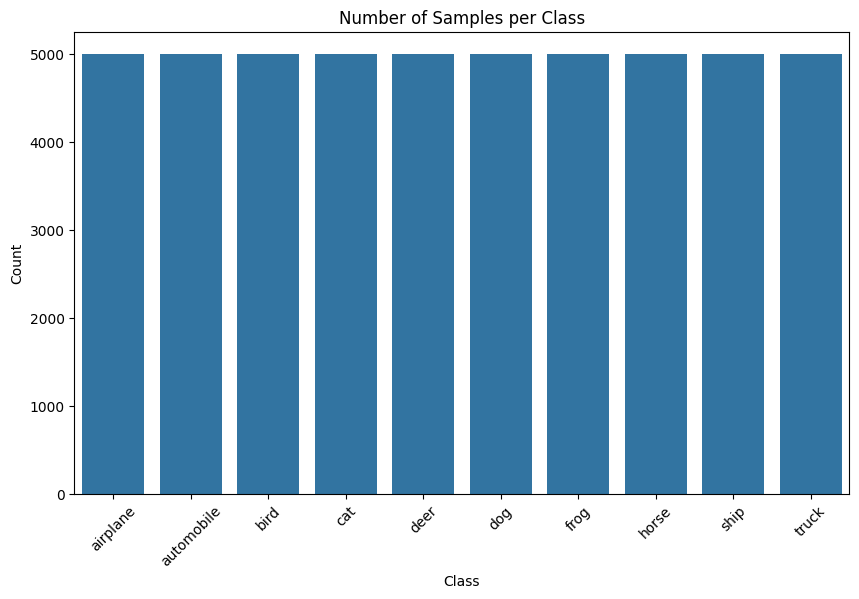

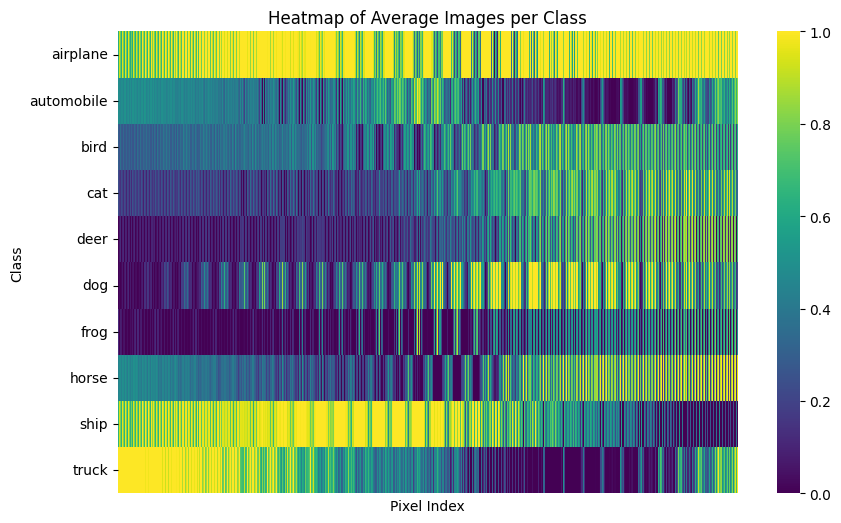

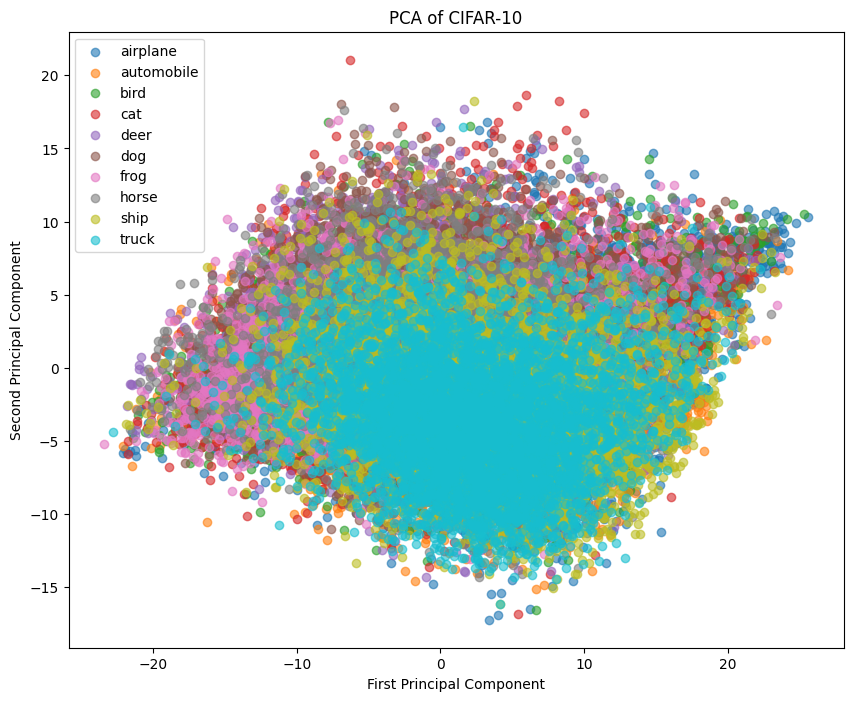

In [20]:
import seaborn as sns  # Importing the Seaborn library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
class_counts = np.bincount(y_train)
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_counts)
plt.title('Number of Samples per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
avg_images = np.array([np.mean(x_train[y_train == i], axis=0) for i in range(10)])
avg_images_flat = avg_images.reshape(avg_images.shape[0], -1)
scaler = MinMaxScaler()
avg_images_flat_norm = scaler.fit_transform(avg_images_flat)

plt.figure(figsize=(10, 6))
sns.heatmap(avg_images_flat_norm, cmap='viridis', xticklabels=False, yticklabels=class_names)
plt.title('Heatmap of Average Images per Class')
plt.xlabel('Pixel Index')
plt.ylabel('Class')
plt.show()

x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_flat)

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(x_pca[y_train == i, 0], x_pca[y_train == i, 1], label=class_names[i], alpha=0.6)

plt.title('PCA of CIFAR-10')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


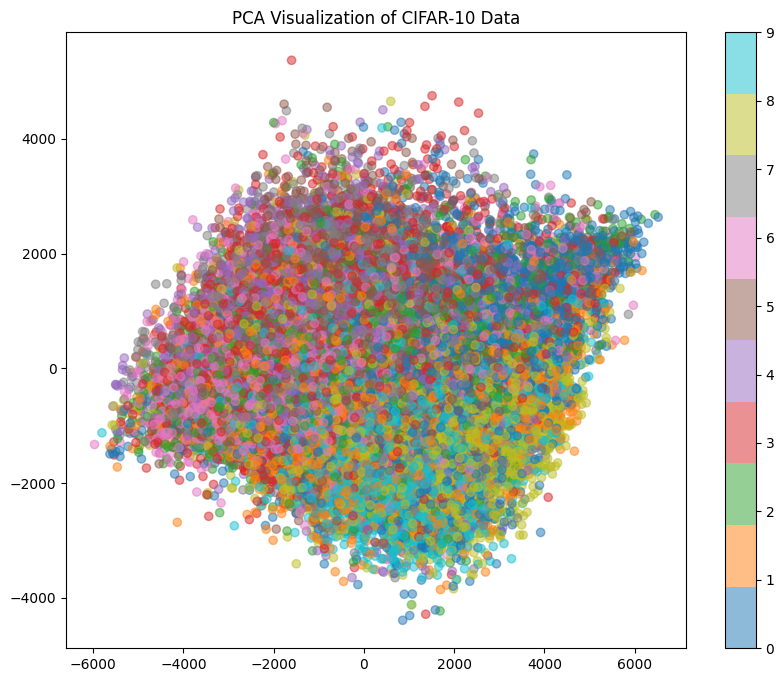

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train.reshape(x_train.shape[0], -1))

plt.figure(figsize=(10, 8))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.5)
plt.title('PCA Visualization of CIFAR-10 Data')
plt.colorbar()
plt.show()

tsne = TSNE(n_components=2)
x_train_tsne = tsne.fit_transform(x_train.reshape(x_train.shape[0], -1))

plt.figure(figsize=(10, 8))
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_train, cmap='tab10', alpha=0.5)
plt.title('t-SNE Visualization of CIFAR-10 Data')
plt.colorbar()
plt.show()
